In [1]:
# Import Libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load Datasets 
df_netflix = pd.read_csv("/Users/kabita/Downloads/netflix_titles.csv")

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
❓ To know the Data Set
</span>

In [3]:
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Basic Information about the dataset
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Shape of the dataset
df_netflix.shape

(8807, 12)

In [6]:
# Unique content in Netflix
df_netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
# Count of unique content in Netflix
df_netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Movies vs TV-Shows
</span>


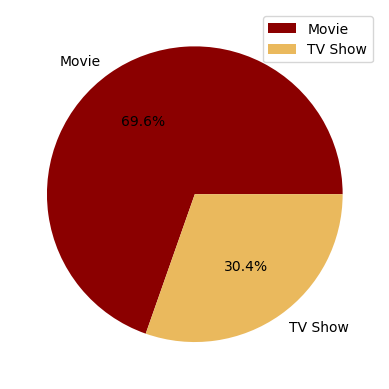

In [8]:
# To see which content is more in Netflix

count_type_netflix = df_netflix['type'].value_counts()

x = count_type_netflix.index
y = count_type_netflix.values

plt.pie(y, labels=["Movie", "TV Show"], colors = ["#8b0000", "#eab95d"], autopct='%1.1f%%')

plt.legend()
plt.show()

<span style="color:#ff8c00; font-size:15px">
• Almost 70% of the content is Movies and the Rest 30% is TV Shows in Netflix.
</span>

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Top 10 Countries with most of the content  
</span>

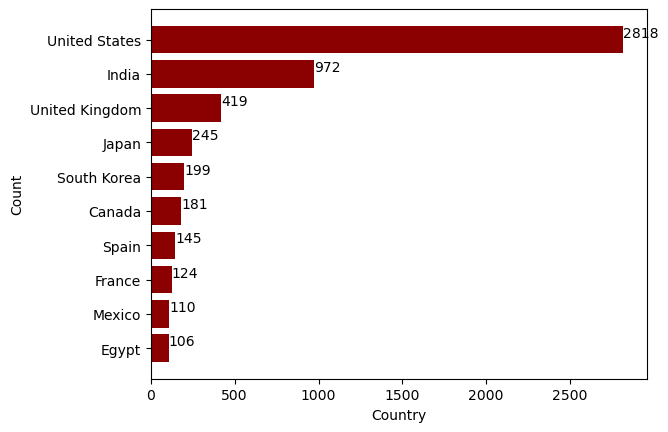

In [9]:
# Top Countries with Netflix Content

count_country_netflix = df_netflix['country'].value_counts()

top_10 = count_country_netflix[:10]
top_10 = top_10.sort_values(ascending=True)
x = top_10.index
y = top_10.values

plt.barh(x,y, color="#8b0000")
plt.xlabel("Country")
plt.ylabel("Count")
for i in range(len(x)):
    plt.text(y[i], i , str(y[i]), ha='left', va='bottom', color='black')

plt.show()

<span style="color:#ff8c00; font-size:15px">
• The top 3 countries with most of content are United States with 2000+ content, India with 900+ content and United Kingdom with 400+ content.
</span>

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Top 10 Countries with Movies and TV Shows split
</span>

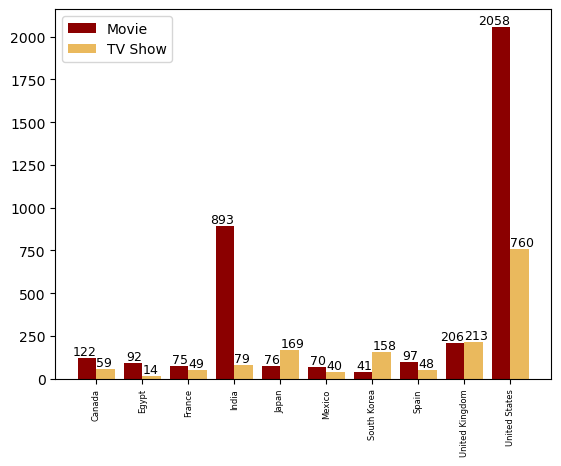

In [10]:
netflix_top_10 = df_netflix[df_netflix['country'].isin(top_10.index)]

netflix_top_10_movies_count = netflix_top_10[netflix_top_10['type']=='Movie']['country'].value_counts().sort_index()
netflix_top_10_shows_count = netflix_top_10[netflix_top_10['type']=='TV Show']['country'].value_counts().sort_index()

x = sorted(netflix_top_10['country'].unique())
y = netflix_top_10_movies_count.values
y1 = netflix_top_10_shows_count.values

width = 0.4
x_labels = x
x_len = np.arange(len(x))
plt.bar(x_len - width/2, y, width, color="#8b0000", label = "Movie")
plt.bar(x_len + width/2, y1, width, color = "#eab95d", label = "TV Show")

plt.legend()
plt.xticks(x_len,x_labels, fontsize=6,rotation='vertical')

for i in range(len(x)):
    plt.text(i, y[i] , str(y[i]), ha='right', va='bottom', color='black', fontsize=9)
    plt.text(i, y1[i] , str(y1[i]), ha='left', va='bottom', color='black', fontsize=9)

plt.show()

<span style="color:#ff8c00; font-size:15px">
• Top Countries with Movies - United States, India and United Kingdom.  <br>
• Top Countries with TV Shows - United States, United Kingdom and Japan.  <br>
• As expected, United States tops the chart followed by India, United Kingdom and Japan. <br>
• Interestingly, the content available in India is heavily skewed towards movies, confirming
the intuition about big influence of bollywood in-house movie production.
</span>

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Rating with maximum content
</span>

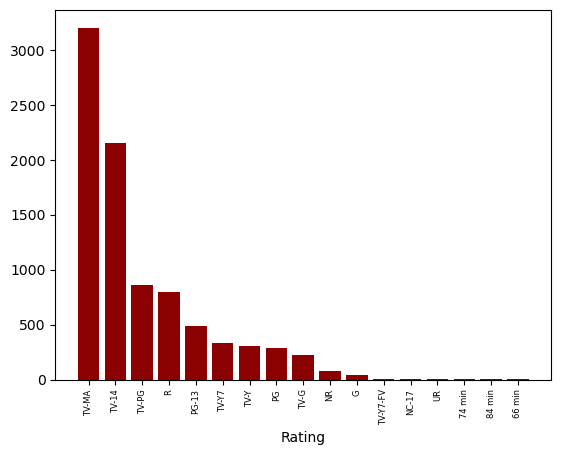

In [11]:
count_rating = df_netflix['rating'].value_counts()
x = count_rating.index
y = count_rating.values

plt.bar(x,y, color="#8b0000")
plt.xticks(x,x, fontsize=6,rotation='vertical')
plt.xlabel("Rating")
plt.show()

<span style="color:#ff8c00; font-size:15px">
• It seems that most of the content on Netflix caters to Mature Audience/Adults (TV-MA)
and then Teens (TV-14).
</span>


<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Overall Content release trend
</span>

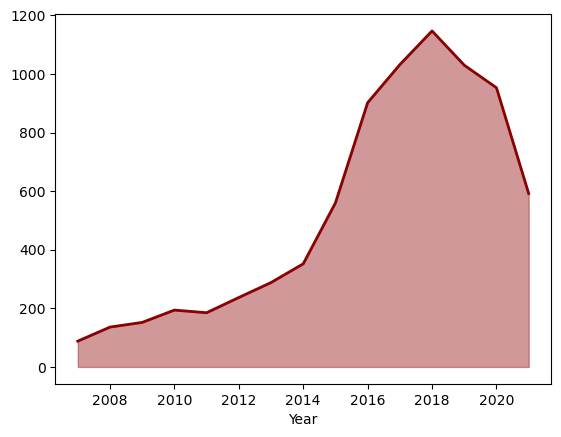

In [12]:
netflix_2007 = df_netflix[df_netflix['release_year']>=2007]
release_year_count = netflix_2007['release_year'].value_counts().sort_index() 
x = release_year_count.index
y = release_year_count.values

plt.fill_between(x, y, color='#a23333', alpha=0.5)  # Fill the area under the curve
plt.plot(x, y, color='#8b0000', linewidth=2) 
plt.xlabel("Year")
plt.show()

<span style="color:#ff8c00; font-size:15px">
• In 2007, Netflix introduced streaming media and video on demand. We see a slow in the beginning but then it picked up in 2014-2015 and there is a rapid increase in 2018.  <br>
By 2018, the content on Netflix was 13 time of 2007 year's content. But it has declined since 2019 since the beginning of covid. <br>
• The other factor could be - In 2019, Disney plus was also launched. Films and television series produced by The Walt Disney Studios and Walt Disney Television, such as Marvel
Movies moved to Disney plus.
</span>


<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Movies vs TV Shows yearly trend
</span>

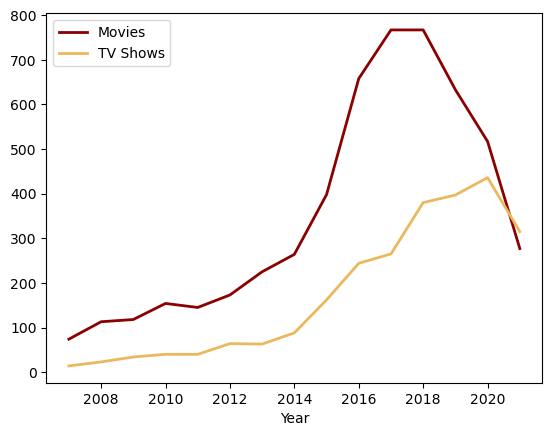

In [13]:
netflix_2007 = df_netflix[df_netflix['release_year']>=2007]

release_year_count_movies = netflix_2007[netflix_2007['type']=='Movie']['release_year'].value_counts().sort_index()
release_year_count_shows = netflix_2007[netflix_2007['type']=='TV Show']['release_year'].value_counts().sort_index()

x = release_year_count_movies.index
y = release_year_count_movies.values
y1 = release_year_count_shows.values

plt.plot(x, y, color='#8b0000', linewidth=2, label='Movies')
plt.plot(x, y1, color='#eab95d', linewidth=2, label='TV Shows')

plt.legend()
plt.xlabel("Year")
plt.show()

<span style="color:#ff8c00; font-size:15px">
• It seems like Netflix focused on movies, and the movie count increases significantly till 2018. <br>
• There's been a decline in the movies count but a steady growth in the TV show since
2018.
</span>

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Genre with the maximum Movies and TV Shows 
</span>

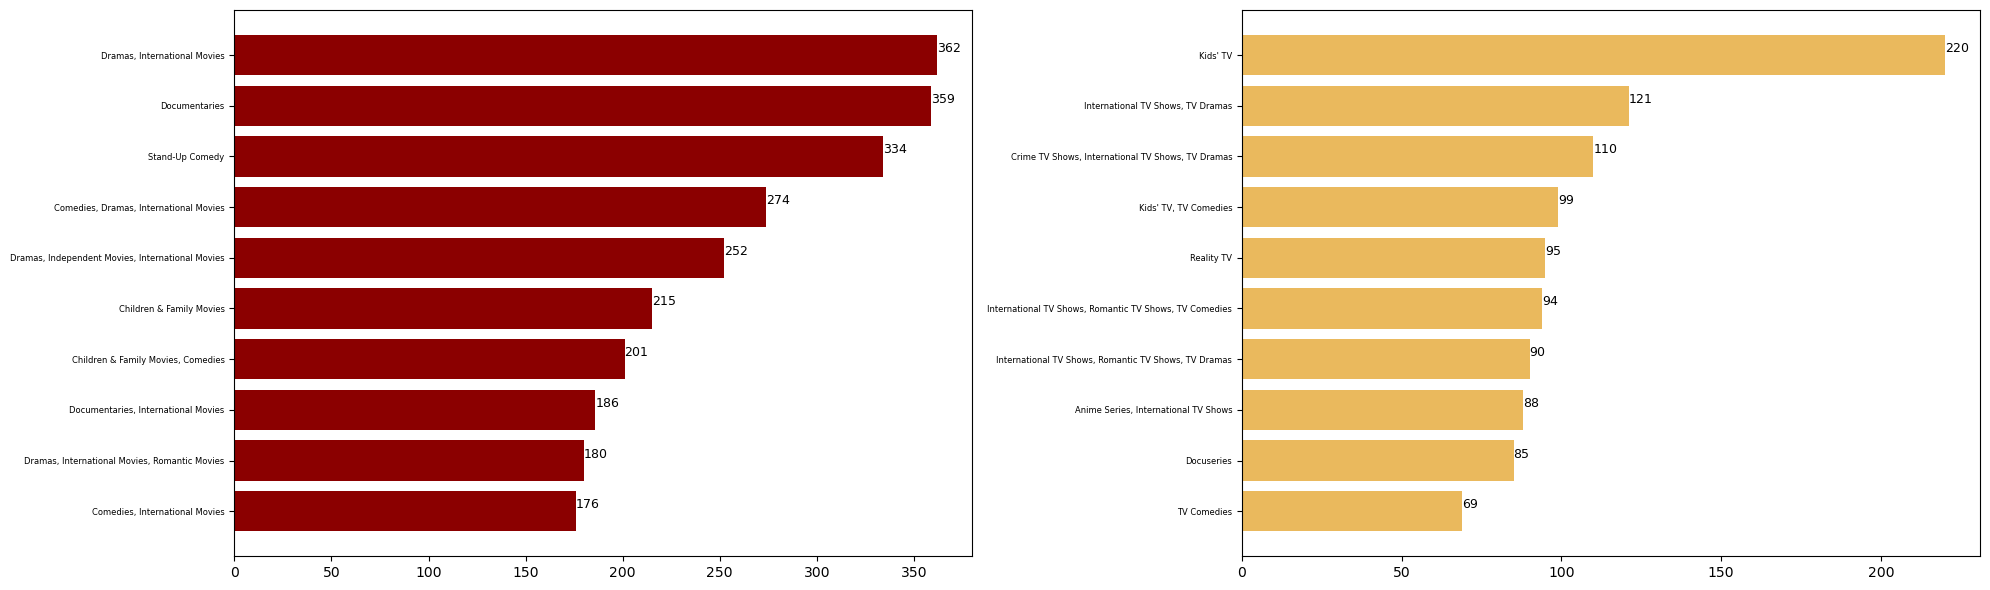

In [14]:
movie_genre_count = df_netflix[df_netflix['type']=='Movie']['listed_in'].value_counts()
shows_genre_count = df_netflix[df_netflix['type']=='TV Show']['listed_in'].value_counts()

top_10_movie_genre = movie_genre_count[:10]
top_10_movie_genre = top_10_movie_genre.sort_values(ascending=True)
x = top_10_movie_genre.index
y = top_10_movie_genre.values

top_10_show_genre = shows_genre_count[:10]
top_10_show_genre = top_10_show_genre.sort_values(ascending=True)
x1 = top_10_show_genre.index
y1 = top_10_show_genre.values

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.barh(x,y, color="#8b0000")
plt.yticks(fontsize=6)
for i in range(len(x)):
    plt.text(y[i], i , str(y[i]), ha='left', va='bottom', color='black', fontsize=9)

plt.subplot(1, 2, 2)
plt.barh(x1,y1, color="#eab95d")
plt.yticks(fontsize=6)
for i in range(len(x1)):
    plt.text(y1[i], i , str(y1[i]), ha='left', va='bottom', color='black', fontsize=9)


plt.tight_layout()
plt.show()    

<span style="color:#ff8c00; font-size:15px">
• For Movies the top 3 genres are Dramas, Documentaries and Stand Up Comedy. <br>
• For TV Shows the top 3 genres are Kids' TV, TV Dramas and Crime TV Shows.
</span>



<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 Movie Duration on Netflix
</span>

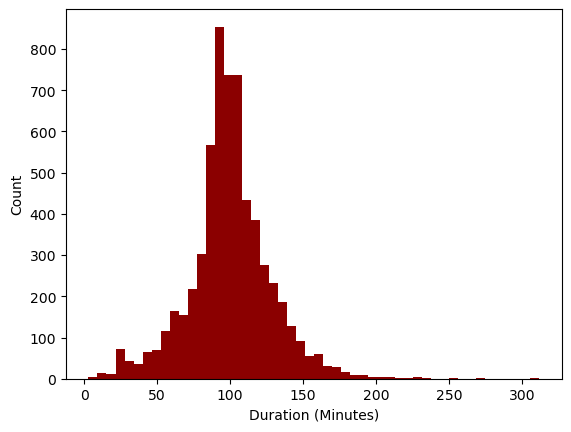

In [15]:
movies = df_netflix[df_netflix['type']=='Movie']
movies.loc[movies['duration'].notnull(), 'duration_min'] = (
    movies.loc[movies['duration'].notnull(), 'duration']
    .str.replace(' min', '')
    .astype(int)
)

x = movies['duration_min'].value_counts().sort_index().index
y = movies['duration_min'].value_counts().sort_index().values

plt.hist(movies['duration_min'], bins=50, color='#8b0000')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


<span style="color:#ff8c00; font-size:15px">
• The duration for most movies on Netflix falls between 80-120 minutes with very few
movies more than 150 minutes.
</span>

<span style="color:#8b0000; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
📺 TV Shows Seasons on Netflix
</span>

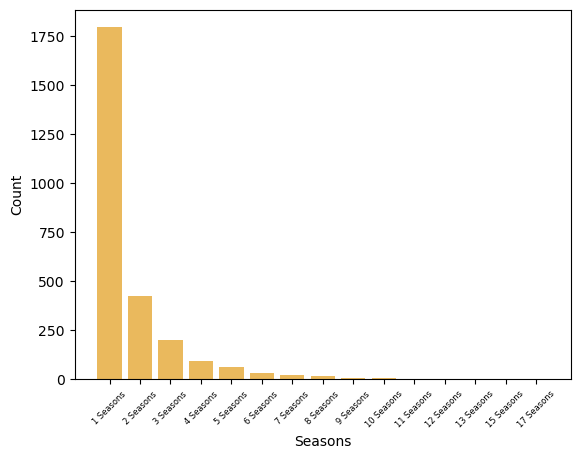

In [16]:
shows = df_netflix[df_netflix['type'] == 'TV Show']

seasons = (
    shows['duration']
    .str.extract(r'(\d+)')[0] 
    .astype(int)  
    .value_counts()
    .sort_index()  
)

x = [f"{i} Seasons" for i in seasons.index]  
y = seasons.values

plt.bar(x, y, color='#eab95d')
plt.xticks(rotation=45,fontsize=6)
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


<span style="color:#ff8c00; font-size:15px">
• In Netflix most shows are of 1 Season only .
</span>